In [4]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería
### Sebastián Flores
https://www.github.com/usantamaria/mat281

## Clase anterior

* Motivación para Data Science y Machine Learning.

#### Pregunta
¿Cuáles son las 3 grandes familias de algoritmos?

* Clustering
* Regresión
* Clasificación

## Iris Dataset

Buscaremos ilustrar los distintos algoritmos con datos reales. Un conjunto de datos interesante y versatil es el Iris Dataset, que puede utilizarse para clustering, regresión y clasificación.

Fue utilizado por Ronald Fisher en su artículo "The use of multiple measurements in taxonomic problems" (1936). 

El conjunto de datos consiste en 50 muestras de 3 especies de Iris (Iris setosa, Iris virginica y Iris versicolor). 
Para cada flor, se midieron 4 características: largo y ancho de los petalos, y largo y ancho de los sépalos, en centímetros.

## Iris Dataset

<img src="images/iris_petal_sepal.png" alt="" width="600px" align="middle"/>

#### Iris Dataset
## Exploracion de datos

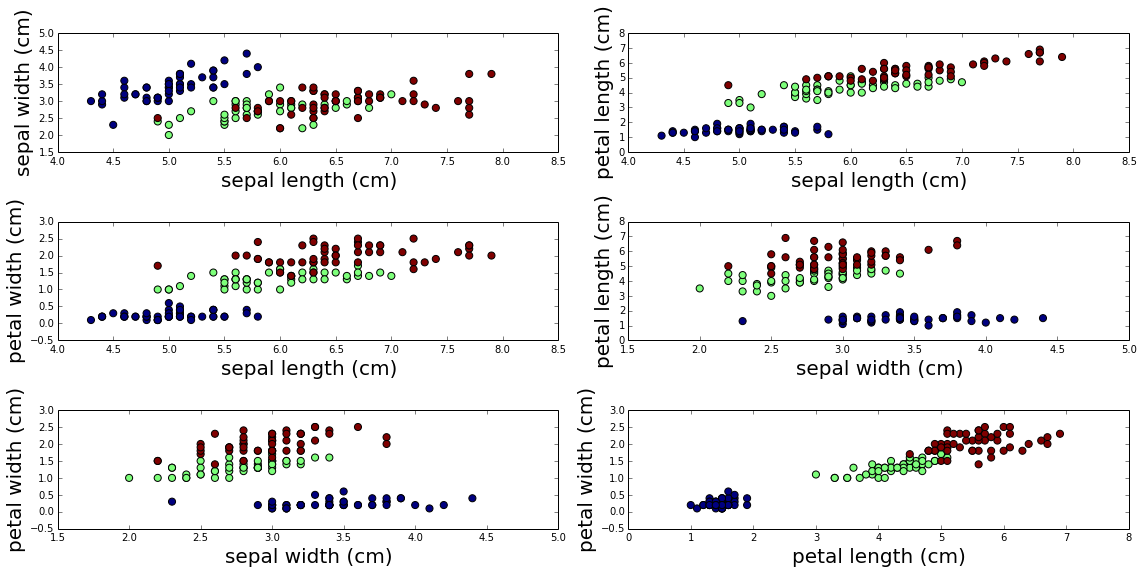

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

def plot(dataset, ax, i, j):
    ax.scatter(dataset.data[:,i], dataset.data[:,j], c=dataset.target, s=50)
    ax.set_xlabel(dataset.feature_names[i], fontsize=20)
    ax.set_ylabel(dataset.feature_names[j], fontsize=20)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(16,8))
plot(iris, ax1, 0, 1)
plot(iris, ax2, 0, 2)
plot(iris, ax3, 0, 3)
plot(iris, ax4, 1, 2)
plot(iris, ax5, 1, 3)
plot(iris, ax6, 2, 3)
f.tight_layout()
plt.show()

## Clustering

Pregunta Crucial: 

¿Si no supiéramos que existen 3 tipos de Iris, seríamos capaces ***algorítmicamente*** de encontrar 3 tipos de flores?

## Clustering

* Se tienen datos sin etiquetar/agrupar.
* Se busca obtener un agrupamiento "natural" de los datos.
* No existen ejemplos de los cuales aprender: **método sin supervisar**.
* Fácil de verificar por inspección visual en 2D y 3D. 
* Difícil de verificar en dimensiones superiores.

## Ejemplo de Problemas de Clustering

* **Segmentación de mercado**: 
  * ¿Cómo atendemos mejor a nuestros clientes?
* **Ubicación de centros de reabastacimiento**: 
  * ¿Cómo minimizamos tiempos de entrega?
* **Compresión de imágenes**: 
  * ¿Cómo minimizamos el espacio destinado al almacenamiento?


## Ubicación centros de reabastecimiento
<img src="images/reabastecimiento1.png" width="500px" align="middle"/>

## Ubicación centros de reabastecimiento
<img src="images/reabastecimiento2.png" width="500px" align="middle"/>

## Compresión de Imágenes
Utilizando todos los colores:
<img src="images/colores.png" width="500px" align="middle"/>

## Compresión de Imágenes
Utilizando únicamente 32 colores:
<img src="images/colores_32means.png" width="500px" align="middle"/>

## Características de un Problema de Clustering

* **Datos de entrada**: Conjunto de inputs sin etiquetas.
* **Datos de salida**: Etiquetas para cada input.

Obs: La etiqueta/label típicamente se asocia a un entero (0,1,2, etc.) pero en realidad es cualquier variable categórica. 

## Algoritmos de Clustering
Buscan utilizar las propiedades inherentes presentes en los datos para organizarlos en grupos de máxima
similitud.

* Algoritmos basados en **conectividad**: Hierarchical Clustering.
* Algoritmos basados en **densidad**: Expectation Maximization
* Algoritmos basados en **centroides**: k-means.


## k-means

* **Input**: set $X$ de $N$ datos $x=(x_1, ..., x_n)$ y un meta-parámetro $k$ con el número de clusters a crear.

* **Output**: Set de $k$ centroides de clusters ($\mu_l$) y una etiquetación de cada dato $x$ en $X$ indicando a qué cluster pertenece.

$x_i$ y $\mu_l$ son vectores en $\mathcal{R}^m$.

La pertenencia es única. Todos los puntos dentro de un cluster se encuentran mas
cercanos en distancia al centroide de su cluster que al centroide de otro cluster.



## k-means

Matemáticamente:
\begin{align*}
\textrm{Minimizar } \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{ respecto a } C_l, \mu_l. 
\end{align*}
Donde $C_l$ es el cluster l-ésimo.

El problema anterior es NP-hard (imposible de resolver en tiempo polinomial, del tipo más difícil de los probleams NP).



## Algoritmo de Lloyd
Heurística que converge en pocos pasos a un mínimo local.

### Procedimiento

* Calcular el centroide del cluster promediando las posiciones de los puntos actualmente en el cluster.

* Actualizar la pertenencia a los clusters utilizando la distancia más cercana a cada centroide.


## <span class="good">¿Cuándo funciona k-means?<span/>
 * Cuando los clusters son bien definidos y pueden separarse por círculos (n-esferas) de igual tamaño.

<img src="images/kmeans1.png" width="600px" align="middle"/>

<img src="images/kmeans2.png" width="600px" align="middle"/>


<img src="images/kmeans3.png" width="400px" align="middle"/>

<img src="images/kmeans4.png" width="400px" align="middle"/>

## <span class="bad">¿Cuándo falla k-means?<span/>
* Cuando se selecciona mal el número $k$ de clusters.
* Cuando no existe separación clara entre los clusters.
* Cuando los clusters son de tamaños muy distintos.
* Cuando la inicialización no es apropiada.

<img src="images/kmeans4.png" width="400px" align="middle"/>

<img src="images/kmeans5.png" width="600px" align="middle"/>

<img src="images/kmeans6.png" width="600px" align="middle"/>

## Ejemplos de k-means

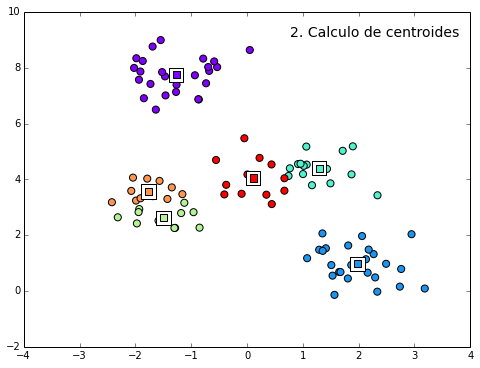

In [11]:
from mat281_code import iplot
iplot.kmeans(N_points=100, n_clusters=4)

## k-means

### <span class="good">Ventajas<span/>
* Rápido y sencillo de programar

### <span class="bad">Desventajas<span/>
* Trabaja en datos continuos, o donde distancias y promedios pueden definirse.
* Heurística depende del puntos iniciales.
* Requiere especificar el número de clusters $k$.
* No funciona correctamente en todos los casos de clustering, incluso conociendo $k$ correctamente.

In [12]:
import numpy as np
from scipy.linalg import norm

def find_centers(X, k, seed=None):
    if seed is None:
      seed = np.random.randint(10000000)
    np.random.seed(seed)
    # Initialize to K random centers
    old_centroids = random_centers(X, k)
    new_centroids = random_centers(X, k)
    while not has_converged(new_centroids, old_centroids):
        old_centroids = new_centroids
        # Assign all points in X to clusters
        clusters = cluster_points(X, old_centroids)
        # Reevaluate centers
        new_centroids = reevaluate_centers(X, clusters, k)
    return (new_centroids, clusters)

In [13]:
def random_centers(X, k):
    index = np.random.randint(0, X.shape[0], k)
    return X[index, :]

In [14]:
def has_converged(new_mu, old_mu, tol=1E-6):
    num = norm(np.array(new_mu)-np.array(old_mu))
    den = norm(new_mu)
    rel_error= num/den
    return rel_error < tol

In [15]:
def cluster_points(X, centroids):
    clusters = []
    for i, x in enumerate(X):
        distances = np.array([norm(x-cj) for cj in centroids])
        clusters.append( distances.argmin())
    return np.array(clusters)

In [17]:
def reevaluate_centers(X, clusters, k):
    centroids = []
    for j in range(k):
        cj = X[clusters==j,:].mean(axis=0)
        centroids.append(cj)
    return centroids

## Aplicación a datos

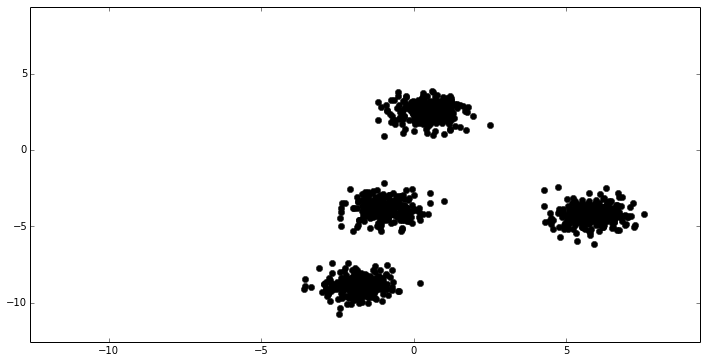

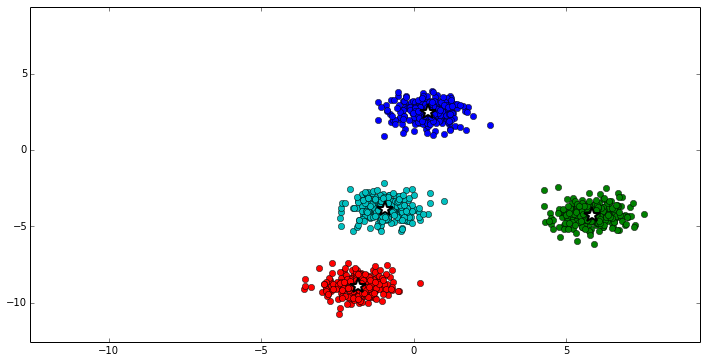

In [23]:
from mat281_code import gendata
from mat281_code import plot
from mat281_code import kmeans

X = gendata.init_blobs(1000, 4, seed=40)
ax = plot.data(X)

centroids, clusters = kmeans.find_centers(X, k=4)
plot.clusters(X, centroids, clusters)

## ¿Es necesario reinventar la rueda?

Utilicemos la libreria sklearn.

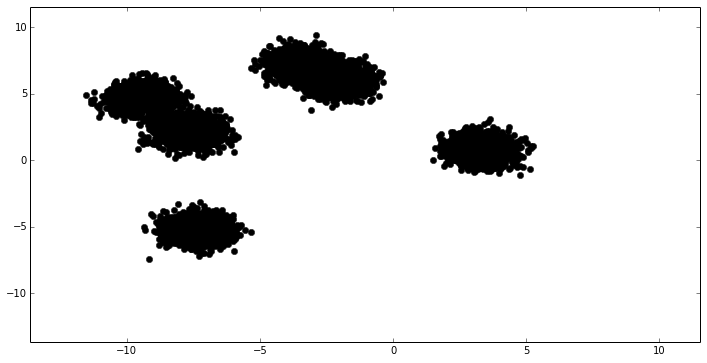

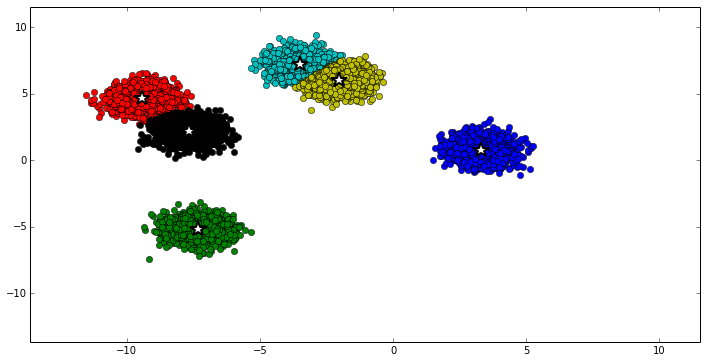

In [28]:
from mat281_code import gendata
from mat281_code import plot
from sklearn.cluster import KMeans

X = gendata.init_blobs(10000, 6, seed=43)
plot.data(X)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
plot.clusters(X, centroids, clusters)

## ¿Cómo seleccionar k?

* Conocimiento previo de los datos.
* Prueba y error.
* Regla del codo (Elbow rule).
* *Estimating the number of clusters in a dataset via the gap statistic*, Tibshirani, Walther and Hastie (2001).
* *Selection of k in k-means*, Pham, Dimov y Nguyen (2004).

## Volviendo al Iris Dataset
Apliquemos k-means al Iris Dataset y calculemos el error de clasificación.
Mostremos el resultado utilizando la matriz de confusión.
<img src="images/predictionMatrix.png" alt="" width="900px" align="middle"/>

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 8

# Loading the data
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X)
y_pred = kmeans.labels_

# Show the classificacion report
cm = confusion_matrix(y_true, y_pred)
print cm
print (cm.sum() - np.diag(cm).sum() ) / float(cm.sum()) # 16/100

[[ 0 27  0  0  0  0  0 23]
 [20  0  0  0  7 20  3  0]
 [ 0  0 10 24  0  1 15  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
0.933333333333


## Referencias

* Jake VanderPlas, ESAC Data Analysis and Statistics Workshop 2014, https://github.com/jakevdp/ESAC-stats-2014
* Andrew Ng, Machine Learning CS144, Stanford University.